In [1]:
!pip install svgpathtools svg.path
import svg.path

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from svgpathtools import svg2paths
paths, attributes = svg2paths('led_bezier.svg')
path = paths[0]

In [3]:
# This examples runs only in python 3.+ versions since Tkinter was changed
from svg.path import Path, Line, Arc, CubicBezier, QuadraticBezier, parse_path

#svgpath = """m 76,232.24998 c 81.57846,-49.53502 158.19366,-20.30271 
#216,27 61.26714,59.36905 79.86223,123.38417 9,156
#-80.84947,31.72743 -125.19991,-53.11474 -118,-91 v 0 """

#path = parse_path(svgpath)

# svg.path point method returns a complex number p, p.real and p.imag can pull the x, and y
# # on 0.0 to 1.0 along path, represent percent of distance along path
n = 100  # number of points segments to get

#pts = [ (p.real,p.imag) for p in (path.point(i/n) for i in range(0, n+1))]  # list comprehension version or loop above

pts = []
for i in range(0,n+1):
    f = float(i)/float(n)  # will go from 0.0 to 1.0
    complex_point = path.point(f)  # point(x) is method on svg.path to return point x * 100  percent along path
    pts.append((complex_point.real, complex_point.imag))

In [22]:
graph_path = np.asarray(pts)
graph_max = np.max(graph_path[:,1])
graph_path[:,1] = graph_max-graph_path[:,1]
#map x to [350, 800] range
x_range = [350, 800]
np.min(graph_path[:,0])
graph_path[:,0] = graph_path[:,0]-np.min(graph_path[:,0])
np.max(graph_path[:,0])
graph_path[:,0] = x_range[0]+(x_range[1]-x_range[0])*(graph_path[:,0]/np.max(graph_path[:,0]))

#map y to [0, 1] range
y_range = [0, 1]
np.min(graph_path[:,1])
graph_path[:,1] = graph_path[:,1]-np.min(graph_path[:,1])
np.max(graph_path[:,1])
graph_path[:,1] =y_range[0]+(y_range[1]-y_range[0])*(graph_path[:,1]/np.max(graph_path[:,1]))

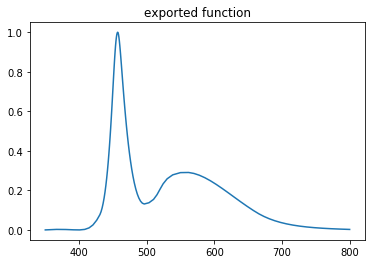

In [23]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(graph_path[:,0], graph_path[:,1])
plt.title('exported function')
plt.show()